In [ ]:
# http://cs231n.github.io/neural-networks-case-study/

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest' # interpaolation is used for colouring inside the plot
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-1, 1)

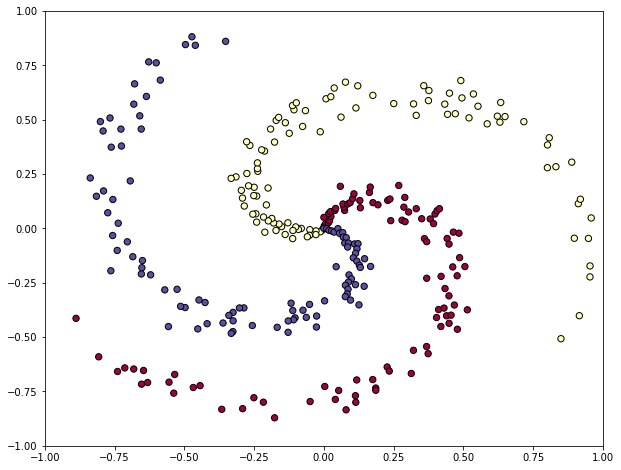

In [4]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes  (Number of features)
X = np.zeros((N*K,D))  #(300,2)
y = np.zeros(N*K, dtype='uint8')  #(300,1)
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius # 0 se lekr 1 tk N chunks me divide kr diya
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]  # equation of circle
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors='k', cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [8]:
h = 100 # size of hidden layer

W = 0.01* np.random.randn(D,h) #(2,100) # D= number of dimensions  # multiplied with 0.01 to convert them to smaller weights 
b = np.zeros((1,h)) #(1,100)

W2 = 0.01* np.random.randn(h,K) # (100,3)
b2= np.zeros ((1,K)) # (1,3)# ek neuron me 3 intercepts hai so dimensions will be (1,3)

step_size = 1e-0 # learning rate (alpha)
# preventing the overfitting of the data we use regularization
reg = 1e-3 # factor of regularization

num_examples = X.shape[0]
for i in range(20000):# we can do automatic stopping here also
    
    # FORWARD PROPAGATION
    
    #(step 1) Calculate class scores 
    X2=np.maximum(0,np.dot(X,W)+b) #(300,100)  # reLu activation max(0,x)
    # matrix multiplication # har neurons me se 300 outputs aayenge bcoz we have 300 inputs data pts.
    scores = np.dot(X2, W2) + b2 # final ans of the output layer #(300,3) # har training example ke liye 3 o/ps aaye
    
    #(step 2) Calculate the class probabilities(softmax)
    exp_scores = np.exp(scores) # (300,3)
    probs = exp_scores / np.sum(exp_scores, axis =1, keepdims=True) # keepdimensions will add sum of the exp_scores into 3 cols 
    #(300,3)
    
    #(step 3) Calculate Loss
    correct_logprobs = -np.log( probs[range(num_examples), y] ) #(300,1)  # only the correct probibilites will get selected
    data_loss = np.sum(correct_logprobs) / num_examples
    
    # (4) Regualarization
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)  # here we have used "L2 regularization" technique
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        #print ("iteration %d: loss %f" % (i, loss)) 
        print(f"iter {i} : loss{loss}")
    
    # BACK PROPAGATION
    
    #(1) Find the gradient of loss
    dscores = probs  # probs me yhat hai.. # (300,3)
    dscores[range(num_examples), y] -= 1 # yhat me se wo value minus krenge jo correct value hai # (300,3) 
    dscores /= num_examples #(300,3)  # for finding the avg gradient.Bcoz we add all the gradient descent at last& to normalise
    #normalize the gradient descent
    
    #(2) Backprop into W2, b2
    dW2 = np.dot(X2.T, dscores) #(100,300)x(300,3)= (100,3) #.T means transpose done here to match the dimensions
    db2 = np.sum(dscores, axis=0, keepdims=True) # keepdims returns the ans in a matrix format #(1,3)
    
    # (3a) Back Prop into hidden layer
    dX2 = np.dot(dscores, W2.T) #(300,3)x(3,100)=(300,100)
    #backprop the ReLu non-lineraity
    dX2[X2<=0] = 0
    
    #(3b) Back prop W,b
    dW = np.dot(X.T,dX2) #(2,100)x(300,100)=(2,100)
    db = np.sum(dX2, axis=0, keepdims=True) #(1,100) #if keepdims is not true then its dimenssions will be 100 as a scalar
    #axis =0  rows collapse
    
    #Regularization 
    dW2 += reg *W2#(100,3)
    dW += reg *W #(2,100)
    
    #(4) Perform parameter update
    W -= step_size * dW #weights will move in the correct dirn as done in linear and logistic regression
    b -=step_size * db
    W2 -= step_size * dW2
    b2-= step_size * db2
    
    

iter 0 : loss1.098531398468504
iter 1000 : loss0.29840109830876693
iter 2000 : loss0.261371768129311
iter 3000 : loss0.24940822753653297
iter 4000 : loss0.24524717303295906
iter 5000 : loss0.24447402243664104
iter 6000 : loss0.2441942744446393
iter 7000 : loss0.2440796684950448
iter 8000 : loss0.2440315979691528
iter 9000 : loss0.24396282089184998
iter 10000 : loss0.2439348613462279
iter 11000 : loss0.24390990471958943
iter 12000 : loss0.24388681732718015
iter 13000 : loss0.2438718354636958
iter 14000 : loss0.24384873141132085
iter 15000 : loss0.24383915341911278
iter 16000 : loss0.24382566957004193
iter 17000 : loss0.24382181704519174
iter 18000 : loss0.24381288585754327
iter 19000 : loss0.2438073202111224


In [9]:
X2 = np.maximum(0, np.dot(X,W)+b) #(300,100)
scores = np.dot(X2,W2) + b2 #(300,3)
predicted_class = np.argmax(scores, axis=1) # axis 1 means cols will merge #(300,)
np.mean(predicted_class == y)


0.98

(-1.8712034092398278, 1.8687965907601756)

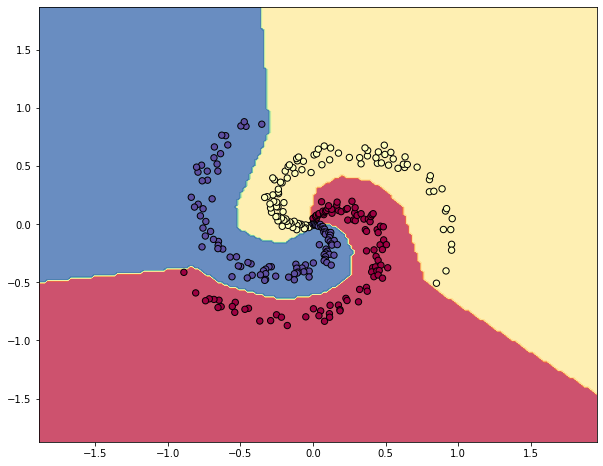

In [11]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolor='k' ,cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')